In [8]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

FILENAME = './data/pima-indians-diabetes.csv'
data = pd.read_csv(FILENAME, header=None, names=['a','b','c','d','e','f','g','h','S'])

D=pd.get_dummies(data)
normD=(D-D.min())/(D.max()-D.min())
normD.head()

,a,b,c,d,e,f,g,h,S
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(normD, test_size=0.2)
Xtrain=train.loc[:,'a':'h']
Ytrain=train.loc[:,'S']
Xtest=test.loc[:,'a':'h']
Ytest=test.loc[:,'S']

Ytrain

123    0.0
325    0.0
642    1.0
692    0.0
373    0.0
404    1.0
353    0.0
253    0.0
622    0.0
519    0.0
670    0.0
150    0.0
24     1.0
668    0.0
424    1.0
319    1.0
598    1.0
534    0.0
686    0.0
298    1.0
259    1.0
121    0.0
684    0.0
62     0.0
677    0.0
619    1.0
318    0.0
144    0.0
9      1.0
654    0.0
      ... 
328    1.0
409    1.0
476    1.0
483    0.0
763    0.0
40     0.0
172    0.0
166    0.0
61     1.0
652    0.0
599    0.0
54     0.0
566    0.0
91     0.0
730    1.0
537    0.0
344    0.0
735    0.0
234    0.0
533    0.0
363    1.0
407    0.0
177    1.0
105    0.0
638    1.0
31     1.0
672    0.0
288    0.0
737    0.0
3      0.0
Name: S, Length: 614, dtype: float64

In [24]:
model = Sequential()
model.add(Dense(200, input_dim=8, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(80, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(60, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [25]:
from keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.02),
              metrics=['accuracy'])
history=model.fit(Xtrain, Ytrain,
                  epochs=100,
                  batch_size=2,
                  validation_data=(Xtest, Ytest))
scores = model.evaluate(Xtest, Ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 1s 1ms/step - loss: 0.6411 - accuracy: 0.6466 - val_loss: 0.5961 - val_accuracy: 0.6494
Epoch 2/100
614/614 [==============================] - 1s 1ms/step - loss: 0.5785 - accuracy: 0.6694 - val_loss: 0.5156 - val_accuracy: 0.7468
Epoch 3/100
614/614 [==============================] - 1s 902us/step - loss: 0.5503 - accuracy: 0.6971 - val_loss: 0.5017 - val_accuracy: 0.7403
Epoch 4/100
614/614 [==============================] - 1s 1ms/step - loss: 0.5123 - accuracy: 0.7443 - val_loss: 0.5372 - val_accuracy: 0.6818
Epoch 5/100
614/614 [==============================] - 1s 1ms/step - loss: 0.5081 - accuracy: 0.7524 - val_loss: 0.4892 - val_accuracy: 0.7403
Epoch 6/100
614/614 [==============================] - 1s 1ms/step - loss: 0.5044 - accuracy: 0.7638 - val_loss: 0.4637 - val_accuracy: 0.7403
Epoch 7/100
614/614 [==============================] - 1s 1ms/step - loss: 0.4884 - accuracy: 

614/614 [==============================] - 1s 884us/step - loss: 0.4674 - accuracy: 0.7899 - val_loss: 0.4700 - val_accuracy: 0.7338
Epoch 58/100
614/614 [==============================] - 1s 1ms/step - loss: 0.4709 - accuracy: 0.7818 - val_loss: 0.4979 - val_accuracy: 0.7403
Epoch 59/100
614/614 [==============================] - 1s 907us/step - loss: 0.4715 - accuracy: 0.7752 - val_loss: 0.4690 - val_accuracy: 0.7403
Epoch 60/100
614/614 [==============================] - 1s 902us/step - loss: 0.4697 - accuracy: 0.7720 - val_loss: 0.4716 - val_accuracy: 0.7468
Epoch 61/100
614/614 [==============================] - 1s 930us/step - loss: 0.4603 - accuracy: 0.7866 - val_loss: 0.4724 - val_accuracy: 0.7273
Epoch 62/100
614/614 [==============================] - 1s 919us/step - loss: 0.4615 - accuracy: 0.7915 - val_loss: 0.4629 - val_accuracy: 0.7403
Epoch 63/100
614/614 [==============================] - 1s 910us/step - loss: 0.4512 - accuracy: 0.7932 - val_loss: 0.5224 - val_accuracy: 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


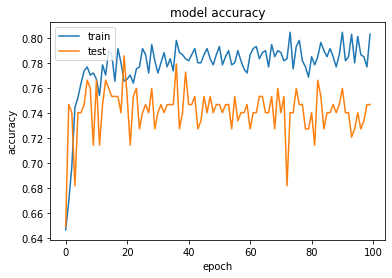

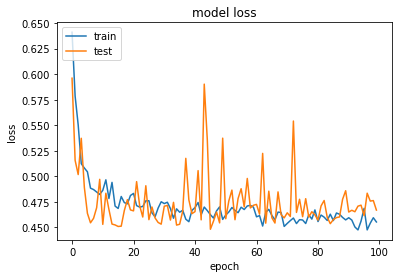

In [26]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
print(history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()